In [1]:

import numpy as np
import random
import plotly.express as px
import scipy 
from sklearn.metrics import confusion_matrix
import seaborn as sns
from scipy.spatial.distance import cdist
from scipy import sparse
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
import ipywidgets as widgets
from sklearn.neighbors import kneighbors_graph
from sklearn.datasets import make_circles
from sklearn.datasets import make_blobs
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from kmeans import *

# K means 

***
### Introduction

K means is an clustering algorithm where groups are identified in the data based on their distance from each other. 
A subset of the data which are similar to each other based on a metric is grouped into cluster. In K-means, the number of clusters is a parameter denoted by <b>K</b>. The metric which we select is a similarity measure such as Euclidean distance/Manhattan distance etc. K means is an unsupervised machine learning algorithm as there is no target variable. 
Clustering algorithms are used in several areas such as market segmentation, insurance fraud detection, delivery store optimization.([Ref](https://dzone.com/articles/10-interesting-use-cases-for-the-k-means-algorithm))

<img src="http://mines.humanoriented.com/classes/2010/fall/csci568/portfolio_exports/mvoget/cluster/kmeans_diagram.png" alt="Alternative text" />

For example, in the above graph, there are two clusters. The entire data(currently in 2D) is being split into two clusters.
Now, suppose we have to classify a new point into the new cluster. We simply take the distances of the point from each 
of the centroids and take the minimum of the values. Then, we assign the new point to the cluster to which the centroid 
belongs. In K means, the centroid is taken as the average of all the data points in the cluster.

***

### Mathematical Representation
The mathematical representation of the clustering algorithm is as follows:-
Given a set of observations ($x_1$, $x_2$, ..., $x_n$), where each observation is a d-dimensional real vector, k-means clustering aims to partition the n observations into k (≤ n) sets S = {$S_1$, $S_2$, ..., $S_k$} so as to minimize the within-cluster sum of squares (WCSS) (i.e. variance). 
Formally, the objective is to find:-
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/8dc15ec63e0676fc07e790f61efd89484a6b7922" alt="Alternative text" />
where $μ_i$ is the mean (also called centroid) of points in $S_i$
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/5f5ae4b286ef97d61ea3f66cd4779e05e1062750" alt="Alternative text" />
where |$S_i$| is the size of $S_i$ and ||.|| is the L2 norm.
This is equivalent to minimizing the pairwise squared deviations of points in the same cluster:
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/01cc35bfd582b45ae43d242d53664cf40b1adfc2" alt="Alternative text" />
Since the total variance is constant, this is equivalent to maximizing the sum of squared deviations between points in different clusters (between-cluster sum of squares, BCSS).([Ref](https://en.wikipedia.org/wiki/K-means_clustering))
***

### Algorithm
1. Specify number of clusters K.
2. Initialize centroids by selecting K random points.
3. Start iterating as follows:-
    - Compute distance of all points from the the K centroids.
    - Assign each point to a centroid based on which centroid had the minimum distance.
    - Recalculate centroids by taking the average of all the data points that belong to each centroid.
4. Keep iterating until there is no change to the centroids. i.e assignment of data points to clusters isn’t changing.

Here, the points associated with each centroid become a cluster. When a new point needs to be predicted as to which 
cluster it lies in, we calculate the distance of each point from each centroid and select the centroid which has the minimum distance. The point belongs to the cluster to which the centroid belongs.


***
### Example of K means algorithm 

Let us say we have data in the form of a circle, 


In [2]:


n_samples = 2000
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)
color_dict = {0:'#f58231',1:'#bfef45',2:'#42d4f4',3:'#469990',4:'#aaffc3',5:'#fffac8',6:'#ffd8b1',7:'#fabed4'}
centroids,labels = kmeans(X,3)

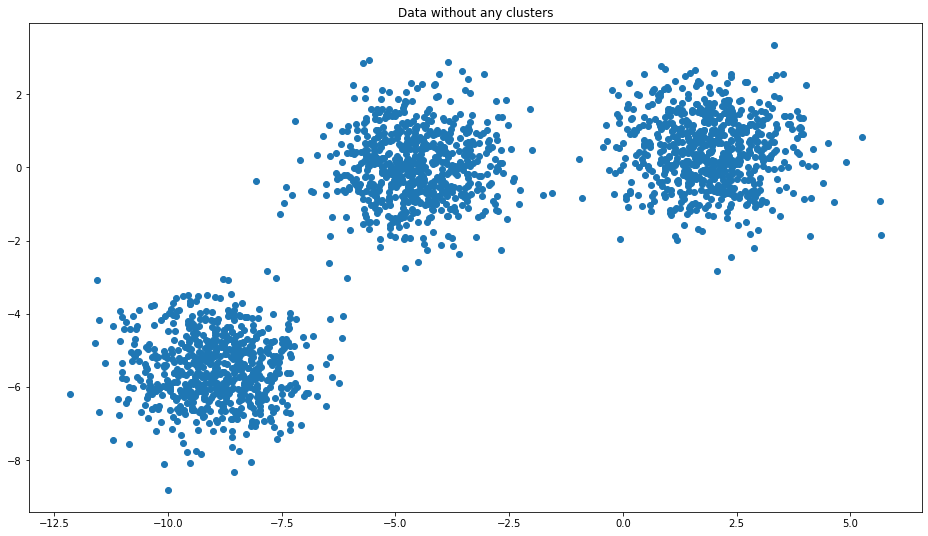

In [3]:

fig,axes = plt.subplots(figsize = (16,9))
axes.scatter(X[:,0],X[:,1]);
axes.set_title('Data without any clusters');

Looking at the data, we should be able to approximately divide the data into 3 clusters.

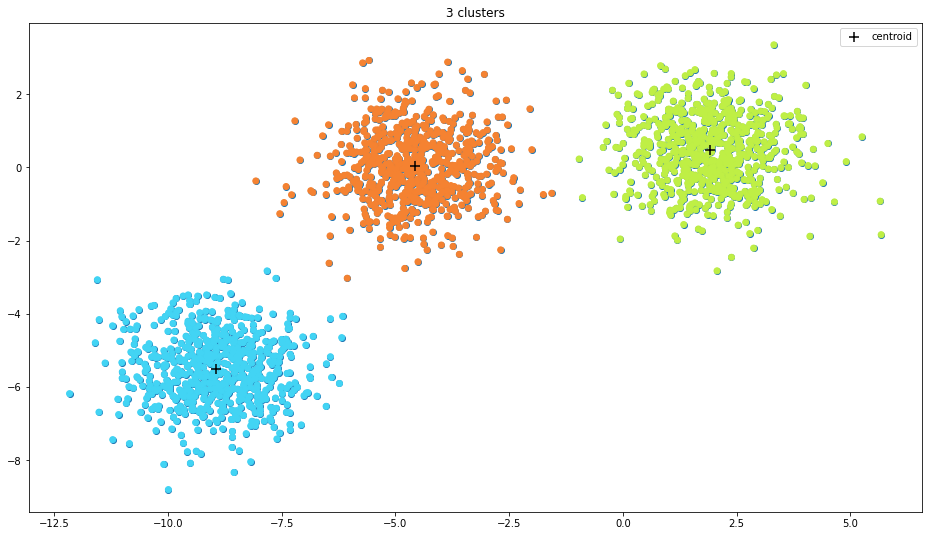

In [4]:
k = 3
centroids,labels = kmeans(X,k)
fig,axes = plt.subplots(figsize = (16,9))
axes.scatter(X[:,0],X[:,1]);
axes.set_title('{} clusters'.format(k));
color_labels = [color_dict[x] for x in labels]
axes.scatter(X[:,0],X[:,1],c = color_labels);
axes.scatter(np.array(centroids)[:,0],np.array(centroids)[:,1],c = 'black',marker = '+',s = 100,label = 'centroid');
axes.legend();

Since, K is a parameter, we can divide it into higher or lower values as well. Now, let us keep 5 as the value of K.

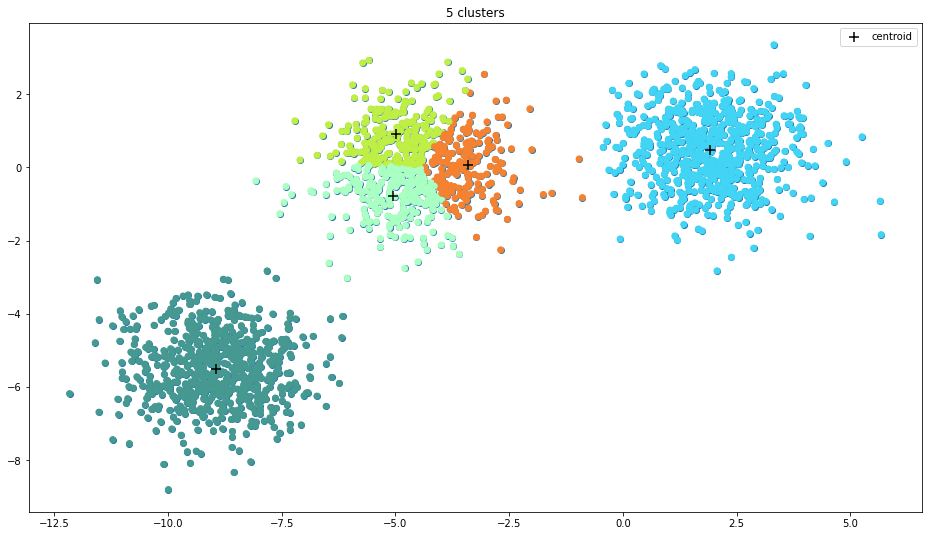

In [5]:
k = 5
centroids,labels = kmeans(X,k)
fig,axes = plt.subplots(figsize = (16,9))
axes.scatter(X[:,0],X[:,1]);
axes.set_title('{} clusters'.format(k));
color_labels = [color_dict[x] for x in labels]
axes.scatter(X[:,0],X[:,1],c = color_labels);
axes.scatter(np.array(centroids)[:,0],np.array(centroids)[:,1],c = 'black',marker = '+',s = 100,label = 'centroid');
axes.legend();

Here, we can see that the initial 2 clusters got divided into 2 sub clusters making the total clusters as 5.

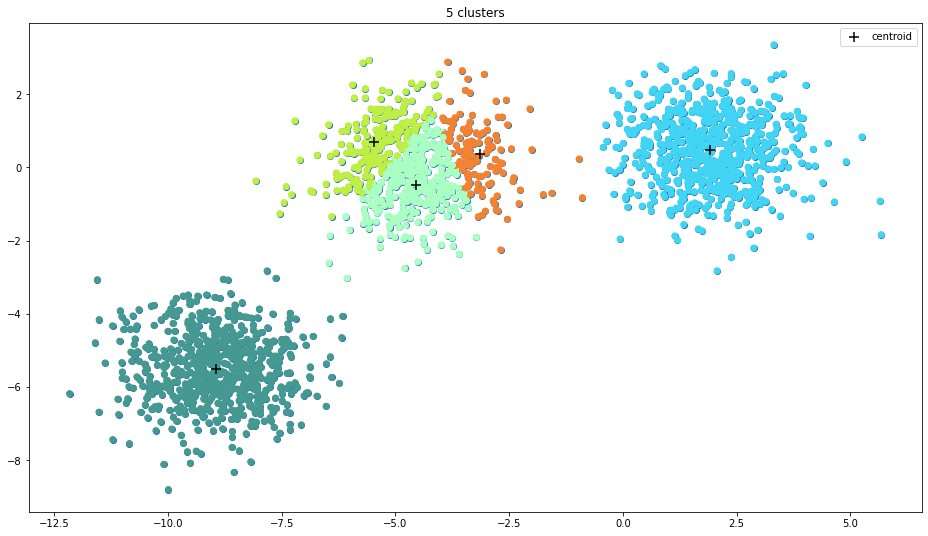

In [6]:
k = 5
centroids,labels = kmeans(X,k,max_iter = 3)
fig,axes = plt.subplots(figsize = (16,9))
axes.scatter(X[:,0],X[:,1]);
axes.set_title('{} clusters'.format(k));
color_labels = [color_dict[x] for x in labels]
axes.scatter(X[:,0],X[:,1],c = color_labels);
axes.scatter(np.array(centroids)[:,0],np.array(centroids)[:,1],c = 'black',marker = '+',s = 100,label = 'centroid');
axes.legend();

In [7]:

    
    
     
_ = widgets.interact(
    kmeans_plot, 
    max_iter = (1, 10, 1), 
    centroids =widgets.fixed('normal'), 
    k = (1, 10, 1), 
    X =widgets.fixed(X),
    tolerance = widgets.fixed(0.01)
)
#kmeans(X,k = 3, centroids='kmeans++',max_iter = 30,tolerance = 0.01)

interactive(children=(IntSlider(value=5, description='k', max=10, min=1), IntSlider(value=3, description='max_…

At k = 3,when we drag the iterations, we can see how the centroids shift to reach the preferred centroid value. In this example, after k = 3, the centroids have reached its values at the 3rd iteration.

### Drawbacks of K-means
***
K-means is not a deterministic algorithm as the centroid selection depends heavily on the points that are selected at
the start. For eg, a bad point selection can result in a suboptimal cluster formation/or higher number of iterations required. For this, we select grades data.

In [8]:
grades = [92.65,93.87,74.06,86.94,92.26,94.46,92.94,80.65,92.86,85.94,91.79,95.23,85.37,87.85,87.71,93.03]
k = 5
tolerance=1e-2
grades = np.array(grades).reshape(-1,1)
centroids,labels = kmeans(grades,3,max_iter = 30,centroids = 'normal')
print(centroids)
centroids,labels = kmeans(grades,3,max_iter = 30,centroids = 'normal')
print(centroids)
centroids,labels = kmeans(grades,3,max_iter = 30,centroids = 'normal')
print(centroids)

[array([92.58833333]), array([84.07428571]), array([94.52])]
[array([92.58833333]), array([84.07428571]), array([94.52])]
[array([93.23222222]), array([77.355]), array([86.762])]


As we can see above, the centroids are different for every run. Hence, there are suboptimal clusters that can be found. We can also see that the number of iterations can also vary depending on centroid selection.
This can be overcome by taking a "smarter" approach to initializing the first centroids. This is where K means++ 
comes to the picture.
***

### Kmeans Algorithm++

The K means ++ algorithm mainly sidesteps from K means in the centroid selection at the start. 
1. The steps Randomly select the first centroid from the data points.
2. For each data point compute its distance from the nearest, previously chosen centroid.
3. Select the next centroid from the data points such that the probability of choosing a point as centroid is directly proportional to its distance from the nearest, previously chosen centroid. (i.e. the point having maximum distance from the nearest centroid is most likely to be selected next as a centroid)
4. Repeat steps 2 and 3 until k centroids have been sampled 

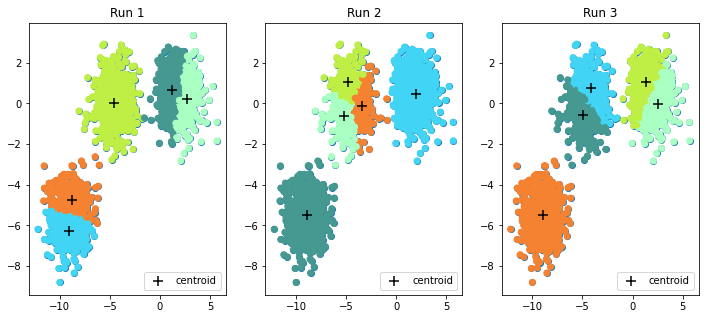

In [9]:
centroids,labels = kmeans(X,5,max_iter = 30,centroids = 'normal')
fig,axes = plt.subplots(figsize = (12,5),ncols = 3)
axes[0].scatter(X[:,0],X[:,1]);
axes[0].set_title('Run 1');
color_labels = [color_dict[x] for x in labels]
axes[0].scatter(X[:,0],X[:,1],c = color_labels);
axes[0].scatter(np.array(centroids)[:,0],np.array(centroids)[:,1],c = 'black',marker = '+',s = 100,label = 'centroid');
axes[0].legend();
centroids,labels = kmeans(X,5,max_iter = 30,centroids = 'normal')
axes[1].scatter(X[:,0],X[:,1]);
axes[1].set_title('Run 2');
color_labels = [color_dict[x] for x in labels]
axes[1].scatter(X[:,0],X[:,1],c = color_labels);
axes[1].scatter(np.array(centroids)[:,0],np.array(centroids)[:,1],c = 'black',marker = '+',s = 100,label = 'centroid');
axes[1].legend();
centroids,labels = kmeans(X,5,max_iter = 30,centroids = 'normal')
axes[2].scatter(X[:,0],X[:,1]);
axes[2].set_title('Run 3');
color_labels = [color_dict[x] for x in labels]
axes[2].scatter(X[:,0],X[:,1],c = color_labels);
axes[2].scatter(np.array(centroids)[:,0],np.array(centroids)[:,1],c = 'black',marker = '+',s = 100,label = 'centroid');
axes[2].legend();

We have had 5 totally different clusters each time we ran. We can resolve this using K means++.

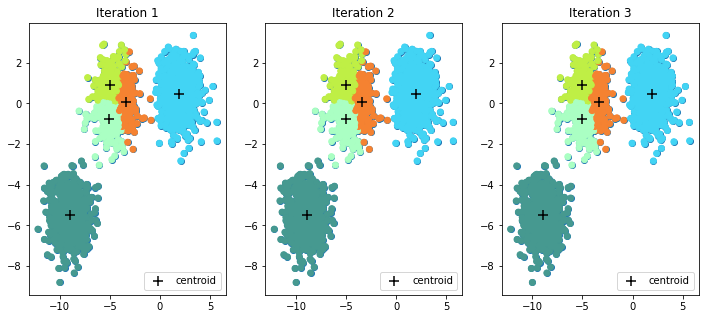

In [10]:
centroids,labels = kmeans(X,5,max_iter = 30,centroids = 'kmeans++')
fig,axes = plt.subplots(figsize = (12,5),ncols = 3)
axes[0].scatter(X[:,0],X[:,1]);
axes[0].set_title('Iteration 1');
color_labels = [color_dict[x] for x in labels]
axes[0].scatter(X[:,0],X[:,1],c = color_labels);
axes[0].scatter(np.array(centroids)[:,0],np.array(centroids)[:,1],c = 'black',marker = '+',s = 100,label = 'centroid');
axes[0].legend();
centroids,labels = kmeans(X,5,max_iter = 30,centroids = 'kmeans++')
axes[1].scatter(X[:,0],X[:,1]);
axes[1].set_title('Iteration 2');
color_labels = [color_dict[x] for x in labels]
axes[1].scatter(X[:,0],X[:,1],c = color_labels);
axes[1].scatter(np.array(centroids)[:,0],np.array(centroids)[:,1],c = 'black',marker = '+',s = 100,label = 'centroid');
axes[1].legend();
centroids,labels = kmeans(X,5,max_iter = 30,centroids = 'kmeans++')
axes[2].scatter(X[:,0],X[:,1]);
axes[2].set_title('Iteration 3');
color_labels = [color_dict[x] for x in labels]
axes[2].scatter(X[:,0],X[:,1],c = color_labels);
axes[2].scatter(np.array(centroids)[:,0],np.array(centroids)[:,1],c = 'black',marker = '+',s = 100,label = 'centroid');
axes[2].legend();

We have the same clusters each time we ran. This shows that Kmeans++ is more deterministic than naive K means in determining clusters. Also, some of the clusters in Kmeans should be suboptimal which means the distance of the points
from their clusters are not minimized. This metric is called distortion and is used in finding the right value of K.

***

### Finding the right value of K(Elbow Method)

In the above example, we can see the right approximate number of clusters are 3. Under the K means algorithm, we can choose
However, we need to identify that using a mathematical 
method. Hence, we can use a non-parametric method called the elbow method.
Under the elbow method, the distortions are calculated as the average of the squared distances from the cluster centers of the respective clusters. 
Typically, the Euclidean distance metric is used.([Ref](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/))

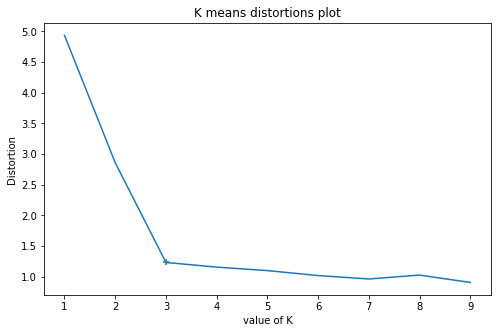

In [11]:
K = range(1, 10)
distortions = {}
for k in K:
    centroids,labels = kmeans(X,k,max_iter = 100,centroids = 'kmeans++')

    distortions[k] = (sum(np.min(cdist(X, centroids,
                                        'euclidean'), axis=1)) / X.shape[0])
fig,axes = plt.subplots(figsize = (8,5))
axes.plot(distortions.keys(),distortions.values());
axes.set_title('K means distortions plot');
axes.set_xlabel('value of K');
axes.set_ylabel('Distortion');
axes.scatter(3,distortions[3],marker = '+',);

As per the elbow method, the right value of K is where the elbow starts or in simpler terms a sudden drop in distortion value.Thus for the given data, we conclude that the optimal number of clusters for the data is 3.

***
### Use cases of K means(Image Compression)


Now that we have understood K means, we use at a use case of K means for image compressesion. Here is a picture of 
a baby elephant. When doing image clustering, we bring down the 3D image array object(color is the 3rd dimension) to a 2D array and then reshape it back after coverting it as per the K means approach.

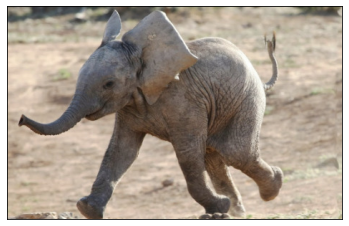

In [16]:
img = read_image('babyelephant.jpeg')

In [17]:
img.shape

(297, 468, 3)

Performing K means 

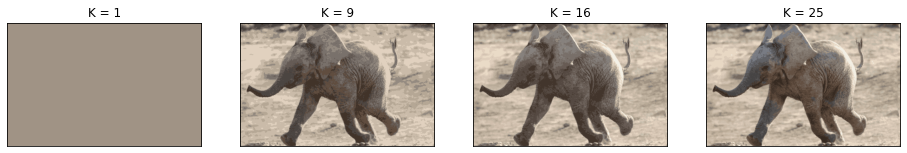

In [18]:
img_reshaped = img.reshape(img.shape[0]*img.shape[1], 3)
centroids, labels = kmeans(img_reshaped, k=1, centroids='kmeans++', tolerance=.01)
new_image = np.array(centroids)[labels]
fig,axes = plt.subplots(ncols = 4,figsize = (16,9));
axes[0].set_title("K = 1");
axes[0].tick_params(axis='both', which='both',bottom=False,top=False,labelbottom=False,labelleft = False,right = False,left = False)
axes[0].imshow(new_image.reshape((img.shape[0],img.shape[1],3)));
centroids, labels = kmeans(img_reshaped, k=9, centroids='kmeans++', tolerance=.01)
new_image = np.array(centroids)[labels]
axes[1].set_title("K = 9");
axes[1].tick_params(axis='both', which='both',bottom=False,top=False,labelbottom=False,labelleft = False,right = False,left = False)
axes[1].imshow(new_image.reshape((img.shape[0],img.shape[1],3)));
centroids, labels = kmeans(img_reshaped, k=16, centroids='kmeans++', tolerance=.01)
new_image = np.array(centroids)[labels]
axes[2].set_title("K = 16");
axes[2].tick_params(axis='both', which='both',bottom=False,top=False,labelbottom=False,labelleft = False,right = False,left = False)
axes[2].imshow(new_image.reshape((img.shape[0],img.shape[1],3)));
centroids, labels = kmeans(img_reshaped, k=25, centroids='kmeans++', tolerance=.01)
new_image = np.array(centroids)[labels]
axes[3].set_title("K = 25");
axes[3].tick_params(axis='both', which='both',bottom=False,top=False,labelbottom=False,labelleft = False,right = False,left = False)
axes[3].imshow(new_image.reshape((img.shape[0],img.shape[1],3)));

Now let us try it on another animal.

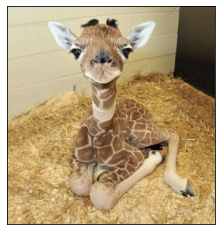

In [20]:
img = read_image('babygiraffe.jpeg')

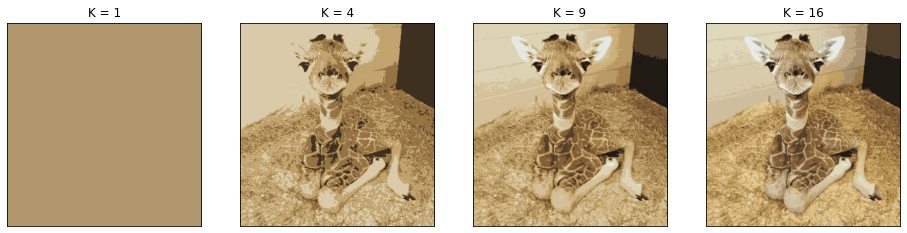

In [21]:
img_reshaped = img.reshape(img.shape[0]*img.shape[1], 3)
centroids, labels = kmeans(img_reshaped, k=1, centroids='kmeans++', tolerance=.01)
new_image = np.array(centroids)[labels]
fig,axes = plt.subplots(ncols = 4,figsize = (16,9));
axes[0].set_title("K = 1");
axes[0].tick_params(axis='both', which='both',bottom=False,top=False,labelbottom=False,labelleft = False,right = False,left = False)
axes[0].imshow(new_image.reshape((img.shape[0],img.shape[1],3)));
centroids, labels = kmeans(img_reshaped, k=4, centroids='kmeans++', tolerance=.01)
new_image = np.array(centroids)[labels]
axes[1].set_title("K = 4");
axes[1].tick_params(axis='both', which='both',bottom=False,top=False,labelbottom=False,labelleft = False,right = False,left = False)
axes[1].imshow(new_image.reshape((img.shape[0],img.shape[1],3)));
centroids, labels = kmeans(img_reshaped, k=9, centroids='kmeans++', tolerance=.01)
new_image = np.array(centroids)[labels]
axes[2].set_title("K = 9");
axes[2].tick_params(axis='both', which='both',bottom=False,top=False,labelbottom=False,labelleft = False,right = False,left = False)
axes[2].imshow(new_image.reshape((img.shape[0],img.shape[1],3)));
centroids, labels = kmeans(img_reshaped, k=16, centroids='kmeans++', tolerance=.01)
new_image = np.array(centroids)[labels]
axes[3].set_title("K = 16");
axes[3].tick_params(axis='both', which='both',bottom=False,top=False,labelbottom=False,labelleft = False,right = False,left = False)
axes[3].imshow(new_image.reshape((img.shape[0],img.shape[1],3)));

Wow, looks like we don't need more than 16 data points to almost reconstruct the image. At K = 9, both the images 
are compressed but are distinguishable. This is extremely useful when we try to use a face recognition software but
need quicker turnaround times.
***

### K means for prediction

We can also use K means for classification. Let us say there is a new point for a binary classification.
We can create a K = 2 clusters. The new point's distance is calculated from the centroid and the point is classified
to the cluster associated with the centroid with the minimum distance. For this, we use the breast cancer dataset.

In [22]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
sc = StandardScaler()
X = sc.fit_transform(X)
centroids,labels = kmeans(X,2)
confusion_matrix = likely_confusion_matrix(y,labels)

In [23]:
confusion_matrix

,Actual Positive,Actual Negative
Predicted Positive,175,37
Predicted Negative,14,343


The accuracy of the K means algorithm is 91%. Not Bad!
***

### Time Complexity of K means

The time complexity is $T(N*K*I*t)$ where N is the number of samples, K is number of clusters & I is 
the required number of iterations required and t is the time required to calculate the distance between two objects.
Here, t & K are taken are constant. Hence, asympotic complexity is $O(N*I)$

In [24]:
def timegraph(params = [int(x) for x in np.linspace(100,10000,100)]):
    time_list = []
    random_state = 170
    for param in params:
        n_samples = param
        X, y = make_blobs(n_samples=param, random_state=random_state)
        start = time.time()
        centroids,labels = kmeans(X,4)
        time_list.append(time.time()-start)
    time_list = pd.Series(time_list,index = params)
    return time_list
time_list = timegraph()

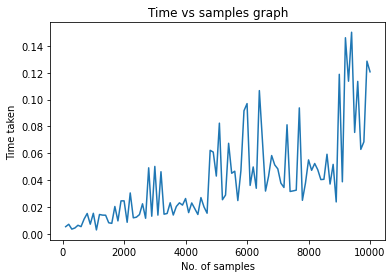

In [25]:
fig,axes = plt.subplots()
axes.set_title('Time vs samples graph');
axes.set_ylabel('Time taken');
axes.set_xlabel('No. of samples');
time_list.plot.line();

We can see that for K = 4, we can see the time increase but there are a lot of noise. This "noise" is due to the number of iterations 
varying. Otherwise,we can see a linear trend in increase in time. In this case, we have taken the value of K as constant
and varied the samples.

In [26]:
model = LinearRegression()
time_fit = np.array([int(x) for x in np.linspace(100,10000,100)]).reshape(-1,1)
model.fit(time_fit,time_list)
print("The R2 is {:.2%}".format(model.score(time_fit,time_list)))

The R2 is 51.56%


We are getting a 51% R2 score when we fit a O(n) model.

In [27]:
model = LinearRegression()
time_fit = np.power(np.array([int(x) for x in np.linspace(100,10000,100)]).reshape(-1,1),2)
model.fit(time_fit,time_list)
model.score(time_fit,time_list)
print("The R2 is {:.2%}".format(model.score(time_fit,time_list)))

The R2 is 52.84%


We are getting a 52% R2 score when we fit a $O(n^2)$ model.

In [28]:
model = LinearRegression()
time_fit = np.power(np.array([int(x) for x in np.linspace(100,10000,100)]).reshape(-1,1),3)
model.fit(time_fit,time_list)
model.score(time_fit,time_list)
print("The R2 is {:.2%}".format(model.score(time_fit,time_list)))

The R2 is 51.36%


The R2 accuracy is dropping at $O(n^3)$. This shows that keeping K constant, we are able to get a $O(n*i)$ time complexity where n is the number of samples and i is the number of iterations.

### Space Complexity of K means

The space complexity of K means is 𝑂((𝑛 + 𝐾)𝑑) where<br>
◦ 𝑛 = number of points,<br>
◦ 𝐾 = number of clusters,<br>
◦ 𝑑 = number of attributes<br>

### Drawbacks of K means/K means++

While K means is a great algorithm with a number of use cases, it unfortunately does not work well on some datasets. Here are a
few disadvantages.([Ref](https://crunchingthedata.com/when-to-use-k-means-clustering/))
1. It assumes spherical density.k-means clustering is that it constrains all clusters to have a spherical shape.
This means that k-means clustering does not perform as well in situations where clusters naturally have irregular shapes.
This is a relatively strict assumption that is not made by all clustering algorithms.
2. Sensitive to scale. Since k-means clustering works by calculating the distance between your data points and the size of centers of your clusters, it can be thrown off by situations where your variables have different scales. If one of your variables is on a much larger scale than the others, for example, that variable will have an outsized effect on the distance calculated. This means that you generally need to re-scale your data before using k-means clustering.
3. Difficult to incorporate categorical variables. As is common with many clustering algorithms, k-means is intended for situations where all of your features are numeric. As such, it does not perform as well in cases where you need to incorporate categorical features in your dataset.
4. Sensitive to outliers. Unlike some other clustering algorithms that are able to identify and exclude outliers, k-means clustering includes every data point in a cluster. That means that the algorithm is somewhat sensitive to large outliers.
5. Sensitive to choice of seed. K-means clustering is relatively sensitive to the starting conditions that are used to initialize the algorithm such as the choice of seed or the order of the data points. This means that you may not get the same results if changes are made to the initialization conditions.
6. Have to choose the number of clusters. Like many other clustering algorithms, k-means clustering requires you to specify the number of clusters that will be created ahead of time. This may be difficult in cases where the true number of clusters is unknown.
7. Struggles with high dimensional data. Like many other clustering algorithms, k-means clustering starts to struggle when many features are included in the model. If you have many potential features, you should consider applying feature selection or dimensionality reduction algorithms to your data before creating your clusters.


There are a few datasets for which K means might not even be appropriate and might give wrong clusters. Here is an example
from scikit learn about other clustering methods.

<img src = https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png>

We can see in the fist example, K means does not do a good job on the data which is in the form of concententric circles. Hence, we look at another algorithm called spectral clustering.

***
### Spectral Clustering

Spectral clustering is a technique which has its foundations in graph theory. In spectral clustering, we create a graph of the data points and create a similarity matrix.
Then, we embed these data points in a lower space  in low dimensional space (spectral embedding) 
in which the clusters are more obvious with the use of eigenvectors of the graph Laplacian. Then, a classical partitioning algorithm
like K means is applied on the dataset.

The algorithm is as follows:-<br>
    1. Calculate the Laplacian L (or the normalized Laplacian).<br>
    2. Calculate k eigenvectors of the Laplacian matrix.<br>
    3. Construct matrix formed by the first k eigenvectors.<br>
    4. Cluster the graph nodes based on the clusters.<br>
Pls note: Below code is references here https://www.kdnuggets.com/2020/05/getting-started-spectral-clustering.html

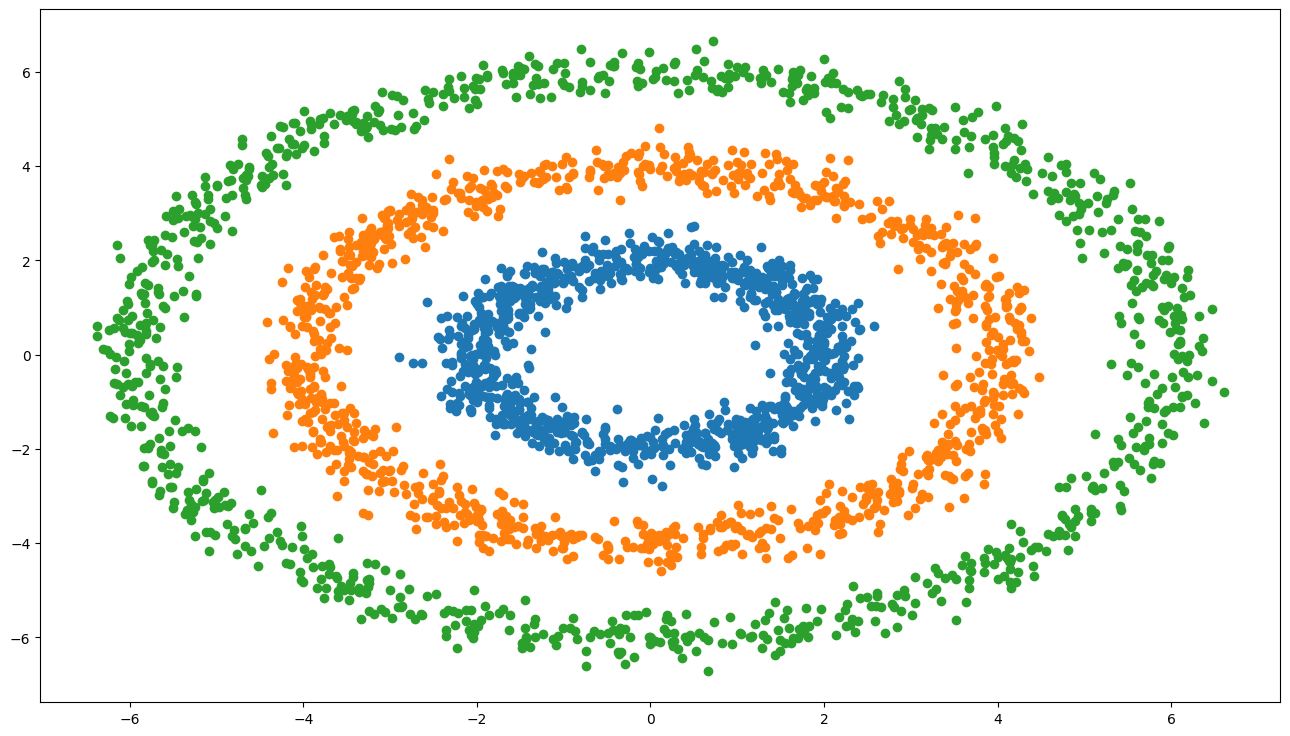

In [23]:

fig, axes = plt.subplots(figsize=(16,9))
coordinates = generate_concentric_circles_data([(2, 1000, 0.25),(4, 1000, 0.25),(6,1000,0.25)])
axes.scatter(coordinates[0][0],coordinates[0][1]);
axes.scatter(coordinates[1][0],coordinates[1][1]);
axes.scatter(coordinates[2][0],coordinates[2][1]);


Now let us try K means on this with 3 clusters.

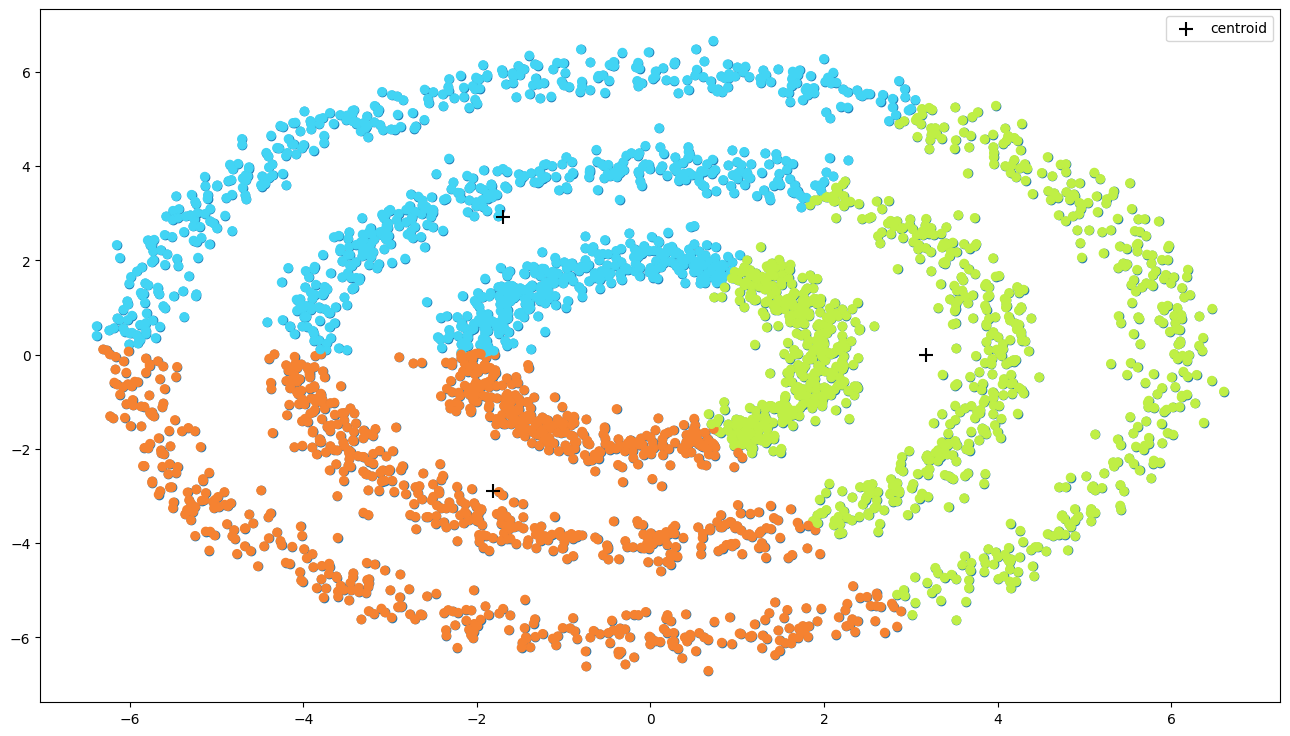

In [24]:
coordinates_reshaped = np.vstack((np.array(coordinates[0]).T,np.array(coordinates[1]).T,np.array(coordinates[2]).T))
centroids,labels = kmeans(coordinates_reshaped,3)
fig,axes = plt.subplots(figsize = (16,9))
axes.scatter(coordinates_reshaped[:,0],coordinates_reshaped[:,1]);
color_labels = [color_dict[x] for x in labels]
axes.scatter(coordinates_reshaped[:,0],coordinates_reshaped[:,1],c = color_labels);
axes.scatter(np.array(centroids)[:,0],np.array(centroids)[:,1],c = 'black',marker = '+',s = 100,label = 'centroid');
axes.legend();

It is certain that these are not the clusters that we hoped for.

Now let us do <b>Spectral Clustering</b> step by step.

<b>Step 1:</b> Generate an adjacency matrix from data.<br>
In this implementation, we use a k neighbours graph with 10 neighbours.

In [25]:
connectivity = kneighbors_graph(X=coordinates_reshaped, n_neighbors=10, mode='connectivity')
adjacency_matrix_s = (1/2)*(connectivity + connectivity.T)

<b><u>Time complexity</u></b>:So what is the time complexity of a k nearest neighbours? There are several algorithms for implementing K nearest neighbours
We use the sklearn's implementation which is automatic and decides it based on the data on hand. A brief overview of the 
algorithms are as follows:-<br>
Here we consider N as number of samples and D as number of features.<br>
1. Brute Force Algorithm: $O(D*N)$<br>
2. Ball Tree: $O(D*log(N))$<br>
3. KD Tree: $O(D*log(N))$ for smaller dimensions. When dimension size increases, it reaches brute force complexity i.e.  $O(D*N)$<br>
Hence scikit learn's implementation would be the Ball Tree/KD Tree approach as we have only 2 dimensions and 3000 data points i.e.  $O(D*log(N))$. 

<b>Step 2:</b> Compute the Laplacian graph of the adjacency matrix.<br>
So what is a Laplacian graph and why do we need it?<br>
The Laplacian is defined as the L=D-A where A is our adjecency matrix we just saw and D is a diagonal matrix.
D is the "degree matrix" , every cell in the diagonal is the sum of the weights for that point.
For example,D(1,1) is the sum of all weights between point 1 and all other points (so it is the sum of row number 1 in the adjacency matrix).
An example is shown below.

<img src="laplacian.png" alt="Alternative text" />

So, a Laplacian can be thought of as a weighted graph and the degree matrix can be thought as the weight of each node.
The adjacency matrix in the above case states whether the data points are connected to each other or not. The degree matrix let us know the distance from each other.

In [26]:
graph_laplacian_s = sparse.csgraph.laplacian(csgraph=adjacency_matrix_s, normed=False)
graph_laplacian = graph_laplacian_s.toarray()

<b><u>Time complexity</u></b>: Creating a laplacian graph matrix is a matrix substraction should be a $O(N^2)$ time complexity where N is the number of samples.

<b>Step 3:</b> Calculate the eigenvalues and eigenvectors of the Laplacian matrix.<br>
The eigenvalues and eigenvectors is also called the spectrum of the Laplacian. We then sort the eigenvalues and eigenvectors.

In [27]:
eigenvals, eigenvcts = np.linalg.eig(graph_laplacian)
eigenvals = np.real(eigenvals)
eigenvcts = np.real(eigenvcts)
eigenvals_sorted_indices = np.argsort(eigenvals)
eigenvals_sorted = eigenvals[eigenvals_sorted_indices]

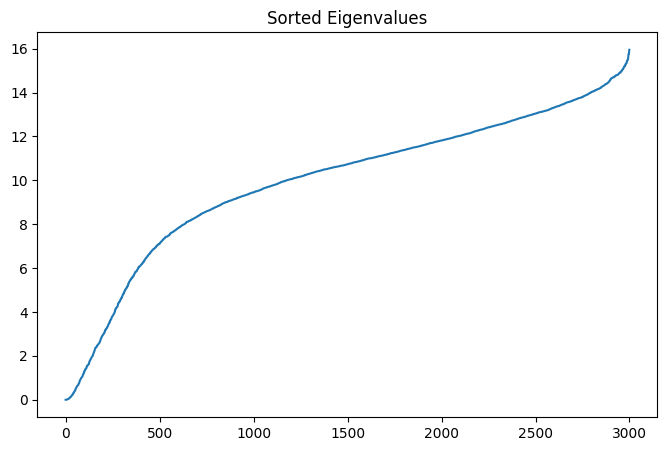

In [28]:
fig,axes = plt.subplots(figsize = (8,5))
axes.plot(np.arange(0,len(eigenvals_sorted)),eigenvals_sorted);
axes.set_title('Sorted Eigenvalues');


We need to look at the eigenvalues which are extremely close to 0. These are corresponding to clusters which are not near
to each other.

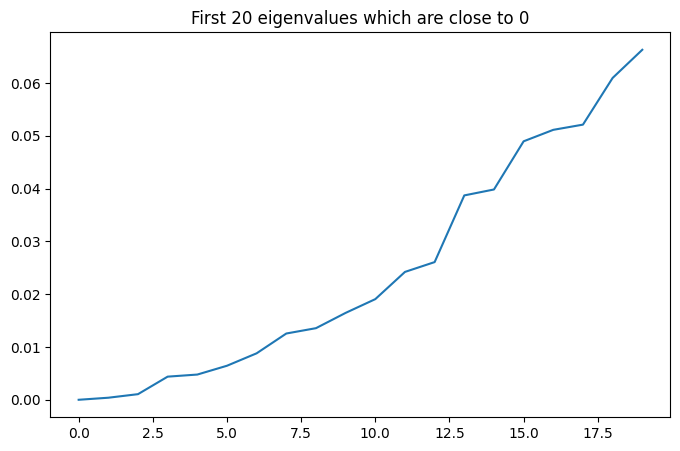

In [29]:
fig,axes = plt.subplots(figsize = (8,5))
axes.plot(np.arange(0,len(eigenvals_sorted[:20])),eigenvals_sorted[:20]);
axes.set_title('First 20 eigenvalues which are close to 0');

We select the eigenvalues which are essentially 0 and find their corresponding eigenvectors. 

<b><u>Time complexity</u></b>:The eigenvalues and eigenvectors calculation is $O(n^3)$.

In [30]:
selected_eigenvecs = eigenvcts[:,eigenvals_sorted_indices[:3]]

<b>Step 4:</b> Run K means on the selected eigenvectors and then divide into clusters. 

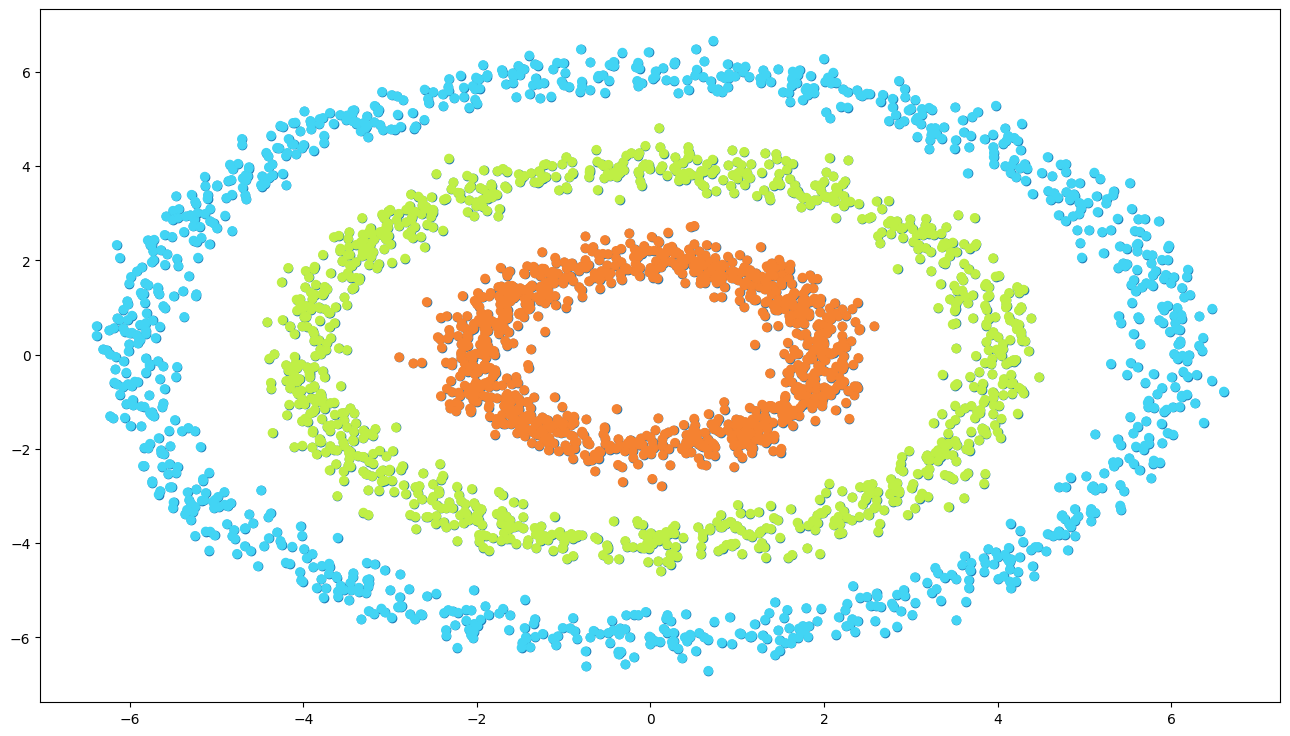

In [31]:
centroids,labels = kmeans(selected_eigenvecs,3)
#cluster = run_k_means(proj_df, n_clusters=3)
coordinates_df = pd.DataFrame(coordinates_reshaped)
#coordinates_df['cluster'] = cluster
coordinates_df['cluster'] = labels
coordinates_reshaped = np.vstack((np.array(coordinates[0]).T,np.array(coordinates[1]).T,np.array(coordinates[2]).T))
centroids,labels = kmeans(coordinates_reshaped,3)
fig,axes = plt.subplots(figsize = (16,9))
axes.scatter(coordinates_reshaped[:,0],coordinates_reshaped[:,1]);
color_labels = [color_dict[x] for x in coordinates_df['cluster']]
axes.scatter(coordinates_reshaped[:,0],coordinates_reshaped[:,1],c = color_labels);

Voila! the clusters have been identified perfectly.

<b><u>Time complexity</u></b>:The time complexity of K means as discussed above is $O(N*D*K*t)$.

The overall time complexity of spectral clustering is mainly dominated by the eigenvalues and eigendecompsition 
which is $O(N^3)$

***